In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('max_columns',200)

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
full_data=pd.read_csv('portugese_financial_insti.csv',sep=';',na_values='None')

In [5]:
full_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


# Take subset of data for ease of processing

In [6]:
df=full_data    #.sample(frac=0.33,axis=0,ignore_index=True,random_state=17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Check Null Values

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Statistical Summary

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Exploratory Data Analysis

In [10]:
# Identify the Categorical and Numerical Columns
catcols=df.select_dtypes(include=['object']).columns.to_list()
numcols=[col for col in df.columns if col not in catcols]

In [11]:
print('Numeric columns: {}'.format(numcols))
print()
print('Categorical Columns: {}'.format(catcols))

Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


# Univariate Analysis

## Univariate Analysis of Numerical Columns

## Analysis of Age

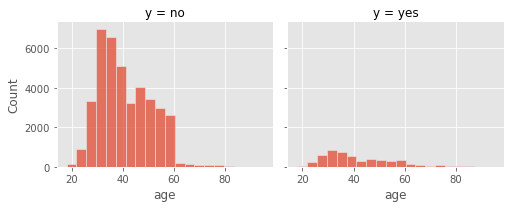

In [12]:
g=sns.FacetGrid(data=df,col='y',height=3,aspect=1.2)
g.map(sns.histplot,'age',bins=20)
plt.show()

<AxesSubplot:xlabel='age', ylabel='y'>

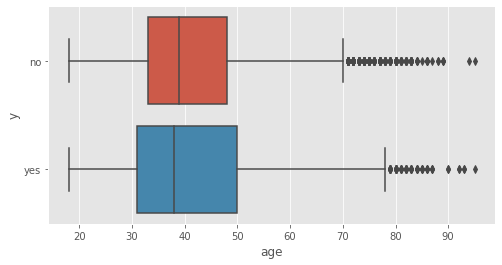

In [13]:
# Let's check out the Outlier with the help of Boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x='age',y='y',data=df)

Inference: In case of 'Not-Subscribed', 70 yrs+ is considered outlier, while for 'Subscribed' it is not.  
So the average age for 'Subscribed' group is higher.

## Analysis of Balance

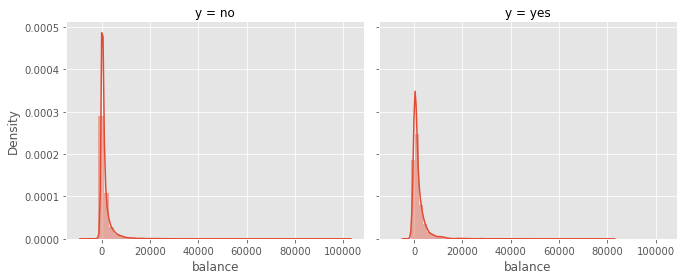

In [14]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.2)
g.map(sns.distplot,'balance')
plt.show()

<AxesSubplot:xlabel='balance', ylabel='y'>

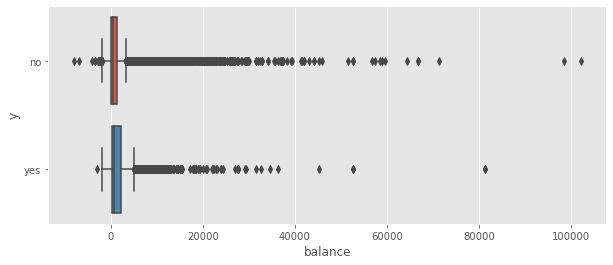

In [15]:
# Let's visualize the Outliers in Balance Column
plt.figure(figsize=(10,4))
sns.boxplot(x='balance',y='y',data=df)

Distribution of balance is similar in both the group: 'Subscribed' and 'Not Surscribed'.

## Analysis of Day

<AxesSubplot:xlabel='day', ylabel='count'>

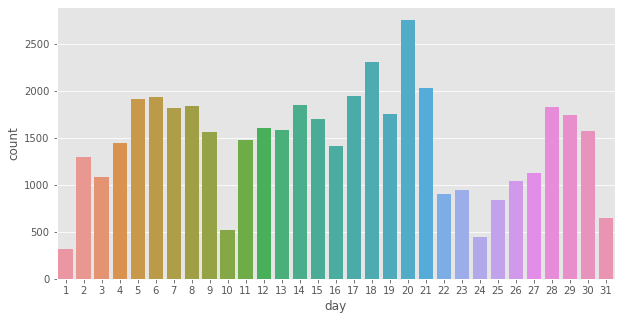

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df)

Most of the calls made during 14-21st of the Month, and then some between 5-8th and some during 28-30th of the month.  
This can be explained by Initial calling after receiving salary at the beginning (5-8th) of the Month.  
Then to follow up after a cooling period of 2 weeks.  
And then at the end of the month if people are looking to invest their monthly savings.

## Analysis of Duration

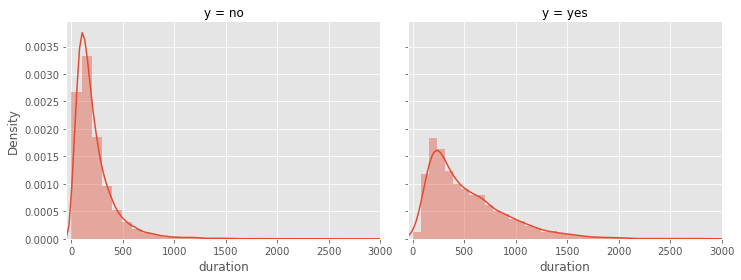

In [17]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.3,sharey=True,xlim=(-50,3000))
g.map(sns.distplot,'duration')

Converting duration from seconds to minutes will give a better idea

<AxesSubplot:xlabel='duration', ylabel='y'>

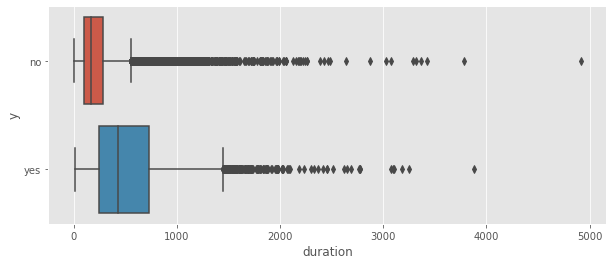

In [18]:
# Outlier visualization of duration
plt.figure(figsize=(10,4))
sns.boxplot(x='duration',y='y',data=df)

So, we see that longer calls during last contact are more likely to get converted,   
indicating they have taken time to understand about the product from the calling agents.

## Analysis of Campaign

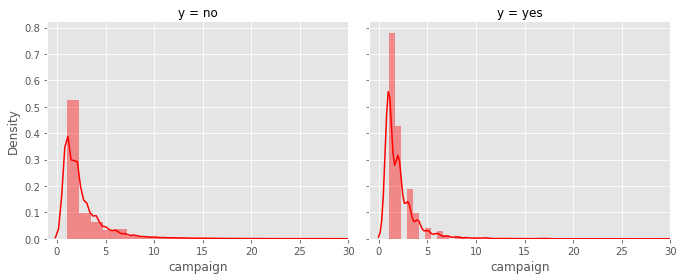

In [19]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.2,xlim=(-1,30))
g.map(sns.distplot,'campaign',color='red')

80% of those subscribed have been contacted between 0-3 times during this campaign.   
So, it makes sense not to contact people beyond at most 5 times during a campaign.

## Analysis of pdays

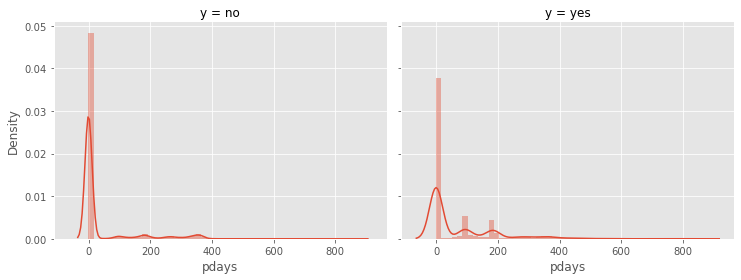

In [20]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.3)
g.map(sns.distplot,'pdays')

For most of the customers, they are being contacted for the first time in this campaign.  
However, some people who have been called 100 or 200 days ago during previous campaign have also been converted in this campaign.  
It also indicates that this Bank probably runs the campaign after every 100 days.

## Analysis of Previous

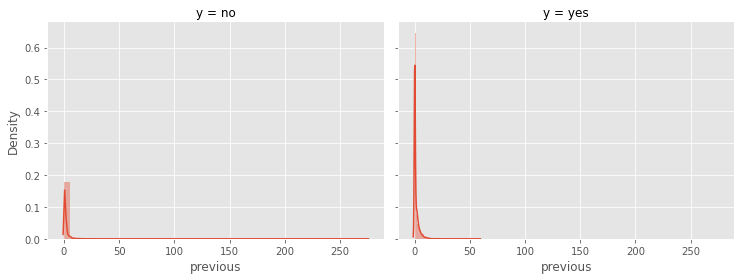

In [21]:
g=sns.FacetGrid(data=df,col='y',height=4,aspect=1.3)
g.map(sns.distplot,'previous')

So, most of the customers were contacted for the first time during this campaign.   
Hence 0 contacts before this campaign.

## Univariate Analysis of Categorical Columns

## Analysis of Job

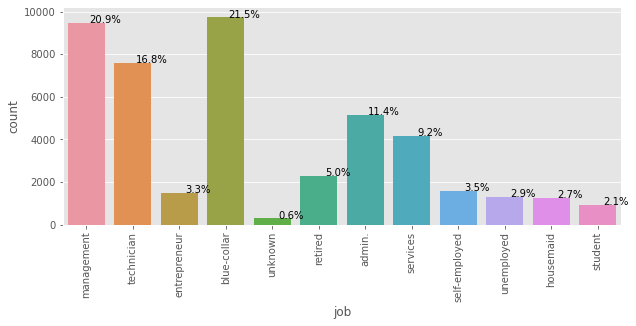

In [22]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='job',data=df)
plt.xticks(rotation='vertical')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

So, most of the customers are from Blue-collar, Management, technician and admin jobs.

## Analysis of Marital

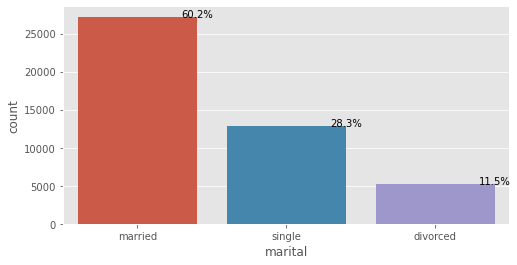

In [23]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='marital',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

Most of the customers contacted are married.

## Analysis of Education

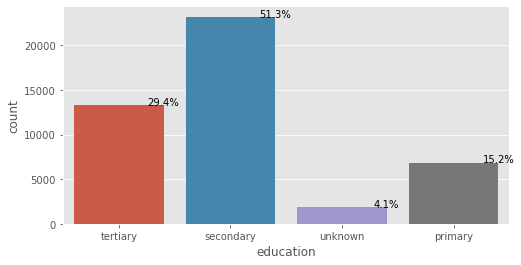

In [24]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='education',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of the customers have Secondary education and beyond.

## Analysis of Default

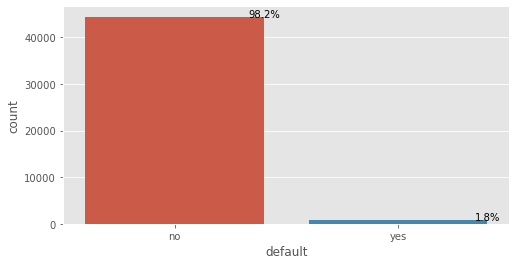

In [25]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='default',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of customers haven't defaulted . So this column can be removed. Very low variance.

## Analysis of Housing

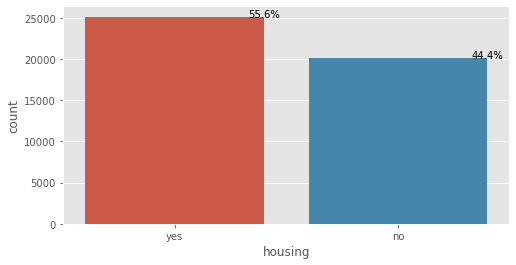

In [26]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='housing',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Almost equal split of whether the customers have taken home loan or not

## Analysis of Contact

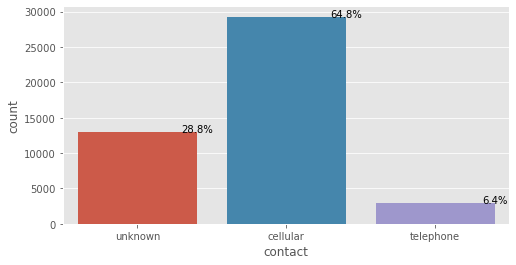

In [27]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='contact',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Majority of customers were contacted via cellphones

## Analysis of Loan

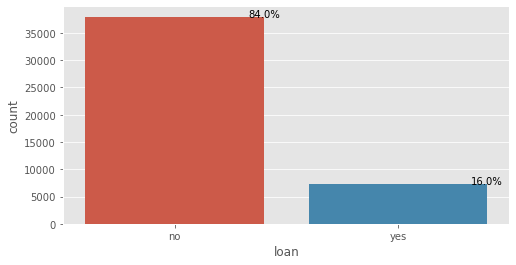

In [28]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='loan',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

 Majority of customers haven't taken any personal loan

# Analysis of Month

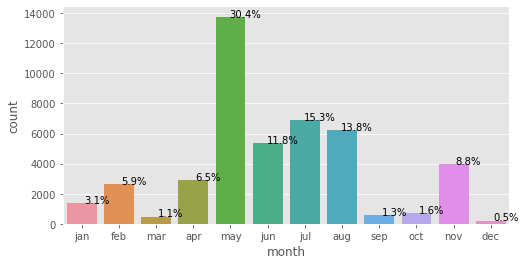

In [29]:
plt.figure(figsize=(8,4))
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
ax=sns.countplot(x='month',data=df,order=months)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Most of the people were called during May-Aug during the current campaign

## Analysis of poutcome (Previous campaign outcome)

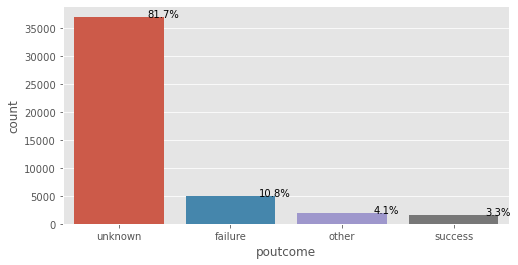

In [30]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x='poutcome',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Most of the Previous campaign outcomes are unknown, so better data collection is needed.

## Analysis of y (Customer Subscribed to Term deposit or not)

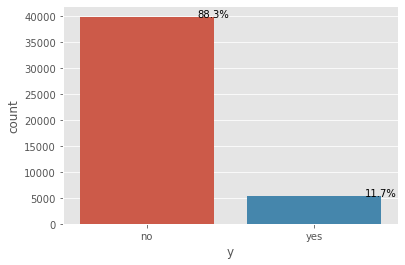

In [31]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='y',data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

So, in our current campaign only 12% of clients are subscribing. So we need to improve our run-rate by better targeting.
We can decrease our operational resources by improving the prediction of who is going to subscribe, and who is not. 

# Bivariate Analysis

## Relationship of Campaign success with age

In [32]:
# Discretize the age Column to age group
from sklearn.preprocessing import KBinsDiscretizer
disc=KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')

In [33]:
disc.fit(df[['age']])

KBinsDiscretizer(encode='ordinal')

In [34]:
df['age_rank']=disc.transform(df[['age']])

In [35]:
disc.bin_edges_

array([array([18., 32., 36., 42., 51., 95.])], dtype=object)

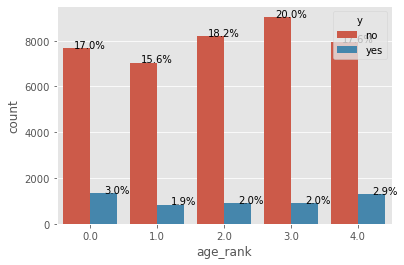

In [36]:
ax=sns.countplot(data=df,x='age_rank',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

So, we see that the conversion is better for youngest and oldest age_groups.  
hence we can target these two demographics, rather than the middle age groups

In [37]:
def age_group(age):
    if age<31:
        return 'young'
    elif age<51:
        return 'middle'
    else:
        return 'senior'

In [38]:
df['age_group']=df['age'].map(age_group)

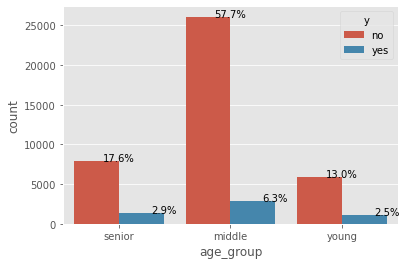

In [39]:
ax=sns.countplot(data=df,x='age_group',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

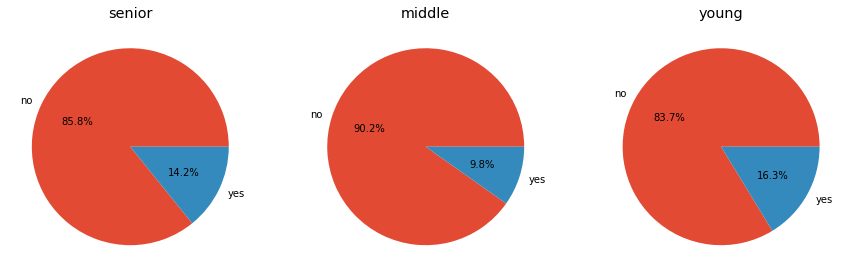

In [40]:
fig,ax=plt.subplots(1,df['age_group'].nunique(),figsize=(15,20))
for i,col in enumerate(df['age_group'].unique()):
    ax[i].pie(x=df[df['age_group']==col]['y'].value_counts(),
              labels=df[df['age_group']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

#### Senior(older than 51) and young(younger than 31) age-groups are far more likely to respond than middle age-group people.  
#### But they are called the least, this could be the reason why run-rate has been low.

## Relationship of Campaign success with Job-type

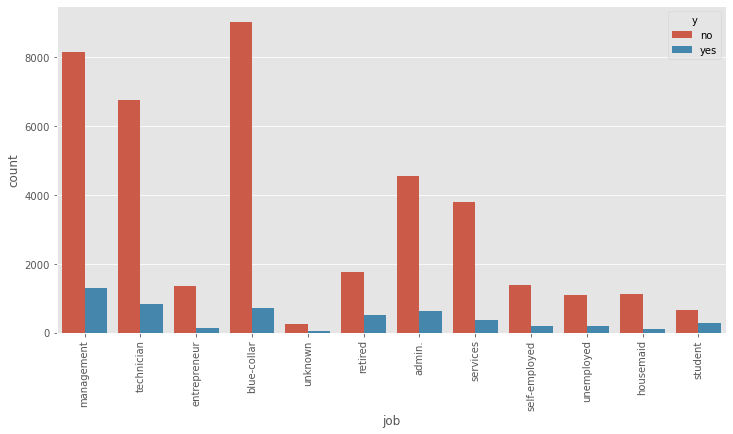

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='job',hue='y')
plt.xticks(rotation='vertical')
plt.show()

In [42]:
# We need to reduce the nos of categories in 'job'
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [43]:
def job_new(job):
    if job in ['self-employed','housemaid','entrepreneur']:
        return 'self_employed'
    elif job in ['unknown','unemployed','student']:
        return 'unemployed'
    elif job in ['blue-collar','services']:
        return 'blue_collar'
    else:
        return job

In [44]:
df['job_type']=df['job'].map(job_new)

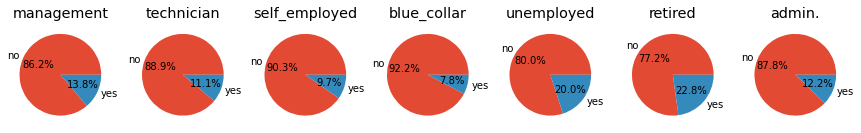

In [45]:
fig,ax=plt.subplots(1,df['job_type'].nunique(),figsize=(15,20))
for i,col in enumerate(df['job_type'].unique()):
    ax[i].pie(x=df[df['job_type']==col]['y'].value_counts(),
              labels=df[df['job_type']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

Retired and unemployed people are more likely to be converted compared to blue-collar and self-employed people.  
But lesser nos of retired people have been contacted historically.

## Relationship of Campaign success with Marital Status

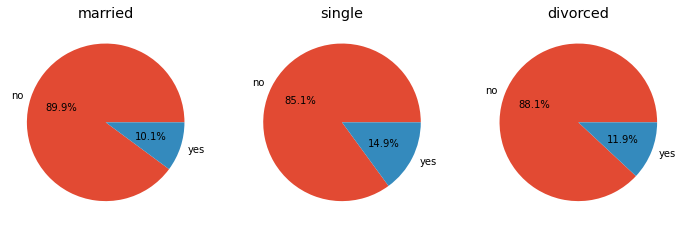

In [46]:
fig,ax=plt.subplots(1,3,figsize=(12,8))
for i,col in enumerate(df['marital'].unique()):
    ax[i].pie(x=df[df['marital']==col]['y'].value_counts(),
              labels=df[df['marital']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

Single people are more likely to be converted than married and divorced people

## Relationship of Campaign success with Education Level

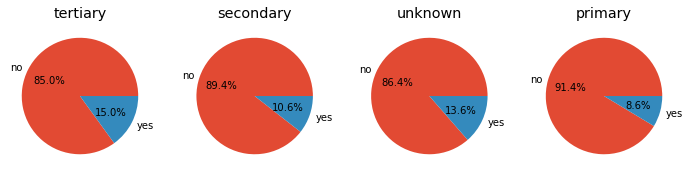

In [47]:
fig,ax=plt.subplots(1,df['education'].nunique(),figsize=(12,10))
for i,col in enumerate(df['education'].unique()):
    ax[i].pie(x=df[df['education']==col]['y'].value_counts(),
              labels=df[df['education']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

People who have completed tertiary education are more likely to be converted than primary or secondary educated people.

## Relationship of Campaign success with Yearly Balance

In [48]:
# Lets create a positive and negative balance column
df['balance_pos']=df['balance'].apply(lambda x: 'yes' if x>0 else 'no')

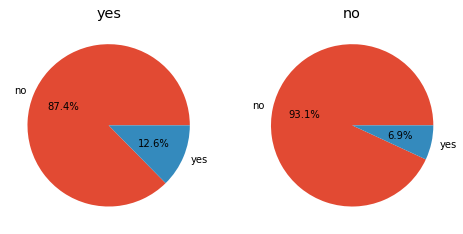

In [49]:
fig,ax=plt.subplots(1,df['balance_pos'].nunique(),figsize=(8,6))
for i,col in enumerate(df['balance_pos'].unique()):
    ax[i].pie(x=df[df['balance_pos']==col]['y'].value_counts(),
              labels=df[df['balance_pos']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

People with positive balance are twice as likely to subscribe to term deposit plan than with nil or negative balance.

In [50]:
# lets discretize the balance column
disc_bal=KBinsDiscretizer(n_bins=10,strategy='quantile',encode='ordinal')
disc_bal.fit(df[['balance']])
df['balance_rank']=disc_bal.transform(df[['balance']])

In [51]:
disc_bal.bin_edges_

array([array([-8.01900e+03,  0.00000e+00,  2.20000e+01,  1.31000e+02,
               2.72000e+02,  4.48000e+02,  7.01000e+02,  1.12600e+03,
               1.85900e+03,  3.57400e+03,  1.02127e+05])             ],
      dtype=object)

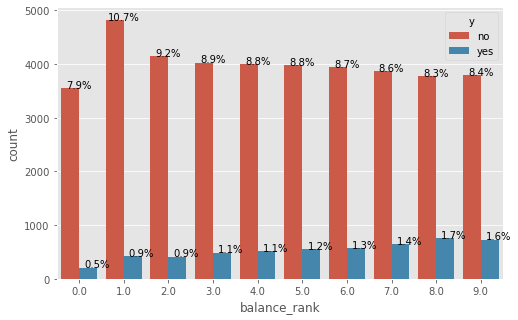

In [52]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df,x='balance_rank',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [53]:
def bal_range(bal):
    if bal<25:
        return 'low_bal'
    elif bal<500:
        return 'medium_bal'
    elif bal<2000:
        return 'high_bal'
    else:
        return 'very_high_bal'

In [54]:
df['bal_range']=df['balance'].map(bal_range)

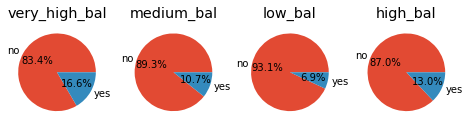

In [55]:
fig,ax=plt.subplots(1,df['bal_range'].nunique(),figsize=(8,6))
for i,col in enumerate(df['bal_range'].unique()):
    ax[i].pie(x=df[df['bal_range']==col]['y'].value_counts(),
              labels=df[df['bal_range']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

So, we see that below when balance<700, they are less likely to subscribe.  
Hence, it is better to target people with balance 700 and above.

## Relationship of Campaign success with Housing Loan Status

In [56]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_rank,age_group,job_type,balance_pos,balance_rank,bal_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4.0,senior,management,yes,8.0,very_high_bal


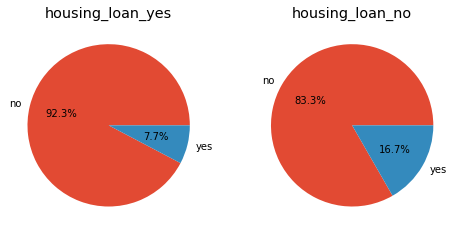

In [57]:
fig,ax=plt.subplots(1,df['housing'].nunique(),figsize=(8,6))
for i,col in enumerate(df['housing'].unique()):
    ax[i].pie(x=df[df['housing']==col]['y'].value_counts(),
              labels=df[df['housing']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title('housing_loan_'+col)

## Relationship of Campaign success with Personal Loan status

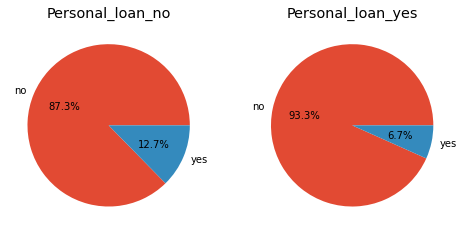

In [58]:
fig,ax=plt.subplots(1,df['loan'].nunique(),figsize=(8,6))
for i,col in enumerate(df['loan'].unique()):
    ax[i].pie(x=df[df['loan']==col]['y'].value_counts(),
              labels=df[df['loan']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title('Personal_loan_'+col)

## Relationship of Campaign success with Contact Medium

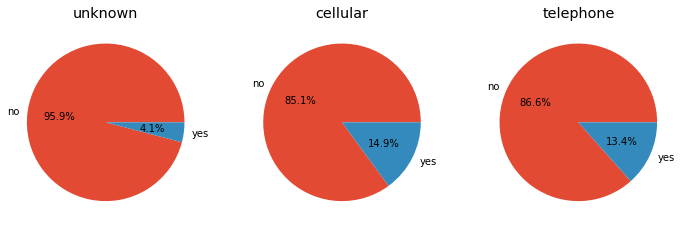

In [59]:
fig,ax=plt.subplots(1,df['contact'].nunique(),figsize=(12,10))
for i,col in enumerate(df['contact'].unique()):
    ax[i].pie(x=df[df['contact']==col]['y'].value_counts(),
              labels=df[df['contact']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

## Relationship of Campaign success with Day-of-Month contacted

In [60]:
# lets create a week of month feature out of day-of-month
def week(day):
    if day<8:
        return 'Week1'
    elif day<15:
        return 'Week2'
    elif day<22:
        return 'Week3'
    else:
        return 'Week4'
    
df['week']=df['day'].map(week)    

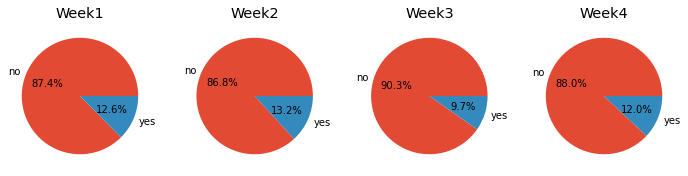

In [61]:
fig,ax=plt.subplots(1,df['week'].nunique(),figsize=(12,10))
for i,col in enumerate(df['week'].unique()):
    ax[i].pie(x=df[df['week']==col]['y'].value_counts(),
              labels=df[df['week']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

The conversion of customers on the basis of time of month converted is more or less uniformly distributed.

## Relationship of Campaign success with Month of last call

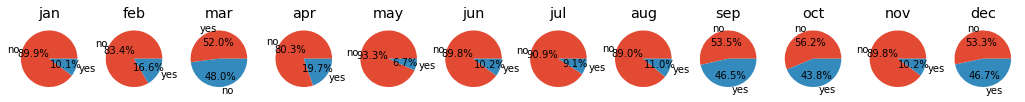

In [62]:
fig,ax=plt.subplots(1,12,figsize=(18,15))
for i,col in enumerate(months):
    ax[i].pie(x=df[df['month']==col]['y'].value_counts(),
              labels=df[df['month']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

Better to keep month column as is and one-hot encode them

## Relationship of Campaign success with Duration of last call

In [63]:
# transform duration into minutes
df['duration']=df['duration']/60

In [64]:
disc_dur=KBinsDiscretizer(n_bins=5,strategy='quantile',encode='ordinal')
disc_dur.fit(df[['duration']])
df['duration_rank']=disc_dur.transform(df[['duration']])

In [65]:
disc_dur.bin_edges_

array([array([ 0.        ,  1.48333333,  2.45      ,  3.71666667,  6.13333333,
              81.96666667])                                                   ],
      dtype=object)

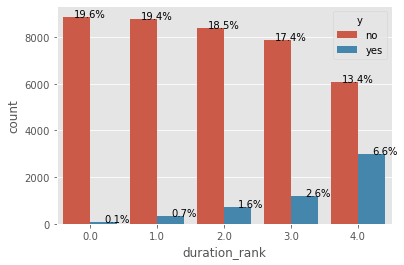

In [66]:
ax=sns.countplot(data=df,x='duration_rank',hue='y')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [67]:
def call_time(time):
    if time<=1:
        return '<1min'
    elif time<=3:
        return '1-3min'
    elif time<=10:
        return '3-10min'
    else:
        return '>10 min'

In [68]:
df['call_dur']=df['duration'].map(call_time)

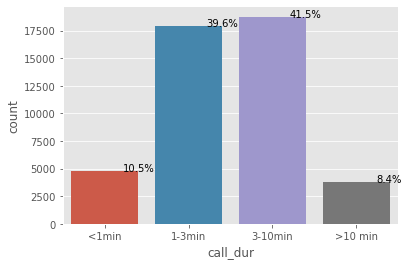

In [69]:
ax=sns.countplot(data=df,x='call_dur',order=['<1min','1-3min','3-10min','>10 min'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

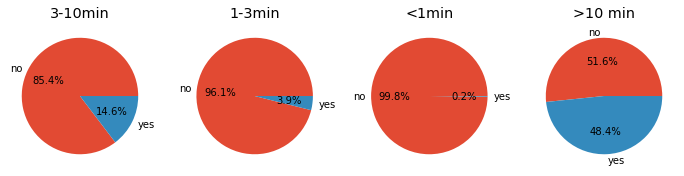

In [70]:
fig,ax=plt.subplots(1,df['call_dur'].nunique(),figsize=(12,10))
for i,col in enumerate(df['call_dur'].unique()):
    ax[i].pie(x=df[df['call_dur']==col]['y'].value_counts(),
              labels=df[df['call_dur']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

So, as the duration of last contact increases beyond 3 mins, conversion increases to 15% and above 10 mins it is almost 50%.

## Relationship of Campaign success with Nos of contacts during this campaign

(-1.0, 25.0)

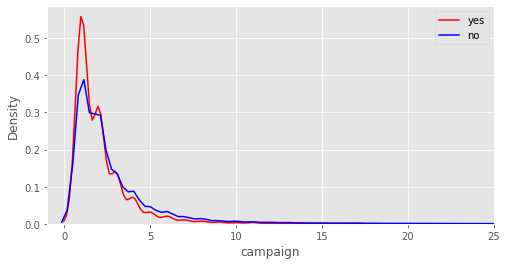

In [71]:
fig,ax=plt.subplots(figsize=(8,4))
sns.distplot(df[df['y']=='yes']['campaign'],color='red',hist=False,ax=ax,label='yes')
sns.distplot(df[df['y']=='no']['campaign'],color='blue',hist=False,ax=ax,label='no')
ax.legend()
ax.set_xlim(-1,25)

## Relationship of Campaign success with nos of days of last contact

In [72]:
df['pdays'].describe().T

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

We can divide into customers who are newly contacted (pdays=-1) and customers who have been previously contacted (!=-1)

In [73]:
df['new_contact']=df['pdays'].apply(lambda x:'new_cust' if x==-1 else 'old_cust')

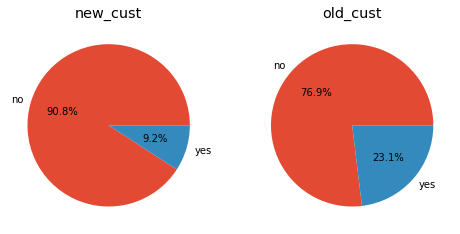

In [74]:
fig,ax=plt.subplots(1,df['new_contact'].nunique(),figsize=(8,6))
for i,col in enumerate(df['new_contact'].unique()):
    ax[i].pie(x=df[df['new_contact']==col]['y'].value_counts(),
              labels=df[df['new_contact']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

So, old customers ie those previously contacted are more likely to subscribe than those contacted for first time.

## Relationship of Campaign success with Outcome of Previous Campaign

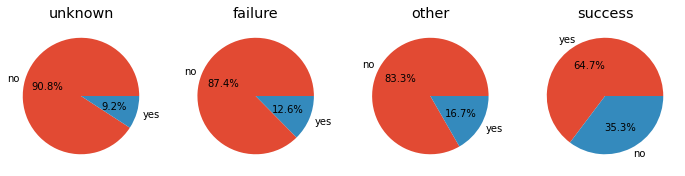

In [75]:
fig,ax=plt.subplots(1,df['poutcome'].nunique(),figsize=(12,10))
for i,col in enumerate(df['poutcome'].unique()):
    ax[i].pie(x=df[df['poutcome']==col]['y'].value_counts(),
              labels=df[df['poutcome']==col]['y'].value_counts().index,autopct='%1.1f%%')
    ax[i].set_title(col)

If in previous campaign, they subscribed, it is highly probable that they will subscribe in current campaign as well.  
'Other' possibly means that their previous term deposit is under process, and they are also likely to convert.  
Also, cause of unknown outcome need to be explored to derive more insights.

## Relationship of Campaign success with Nos of contact during Previous Campaigns

In [76]:
df['previous'].describe().T

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

This is similar to the pdays column, and hence need not be treated separately. Can be dropped

## More Data Transformations

Let's Review the current dataset and its columns

In [77]:
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_rank,age_group,job_type,balance_pos,balance_rank,bal_range,week,duration_rank,call_dur,new_contact
40441,56,blue-collar,married,primary,no,1137,no,no,telephone,2,jul,2.933333,1,-1,0,unknown,yes,4.0,senior,blue_collar,yes,7.0,high_bal,Week1,2.0,1-3min,new_cust
22961,46,technician,married,secondary,no,1596,yes,no,cellular,26,aug,1.766667,7,-1,0,unknown,no,3.0,middle,technician,yes,7.0,high_bal,Week4,1.0,1-3min,new_cust
3667,36,blue-collar,married,secondary,no,512,yes,no,unknown,16,may,5.716667,1,-1,0,unknown,no,2.0,middle,blue_collar,yes,5.0,high_bal,Week3,3.0,3-10min,new_cust
6217,29,admin.,single,tertiary,no,2904,yes,no,unknown,27,may,0.550000,1,-1,0,unknown,no,0.0,young,admin.,yes,8.0,very_high_bal,Week4,0.0,<1min,new_cust


In [78]:
# Outlier capping of age column
# ohe of marital column
# label encoding of education column
# Drop the default column (low variance)
# Outlier capping of Balance column
# Encoding housing and loan as 0 and 1
# ohe of contact column 
# drop the day column
# ohe month column
# outlier capping duration column
# outlier capping campaign column
# drop the pdays, and previous columns
# label encode the poutcome column
# drop the job column
# ohe the job_type column

In [79]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_rank', 'age_group', 'job_type',
       'balance_pos', 'balance_rank', 'bal_range', 'week', 'duration_rank',
       'call_dur', 'new_contact'],
      dtype='object')

## Train-Test Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
feat=['age','job_type','marital','education','balance','housing',
     'loan','contact','month','duration','campaign','poutcome',
     'age_group','bal_range','week','call_dur','new_contact']

In [82]:
X=df[feat]
y=df['y'].apply(lambda x: 1 if x=='yes' else 0)

In [83]:
np.mean(y)

0.11698480458295547

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [86]:
X.sample(3)

,age,job_type,marital,education,balance,housing,loan,contact,month,duration,campaign,poutcome,age_group,bal_range,week,call_dur,new_contact
13423,51,self_employed,married,secondary,-201,no,yes,cellular,jul,2.550000,2,unknown,senior,low_bal,Week2,1-3min,new_cust
877,45,blue_collar,married,secondary,154,yes,no,unknown,may,18.966667,1,unknown,middle,medium_bal,Week1,>10 min,new_cust
22265,33,technician,single,tertiary,316,no,no,cellular,aug,2.100000,3,unknown,middle,medium_bal,Week3,1-3min,new_cust


In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33908, 17)
(11303, 17)
(33908,)
(11303,)


## Outlier Capping

Let's create a function to cap Outliers.  
We will be using IQR method, ie upper whisker=Q3+1.5 IQR and lower whisker=Q1-1.5 IQR.  
Values beyond the whiskers will be re-assigned the whisker values.

In [88]:
def outlier_capping(df,col):

        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        
        upper_whisker=q3 + 1.5 * iqr
        lower_whisker=q1- 1.5 * iqr
        
        df[col]=np.where(df[col]>upper_whisker,upper_whisker, #true action
                        np.where(df[col]<lower_whisker,lower_whisker,df[col]))

Text(0.5, 1.0, 'Before Outlier Capping')

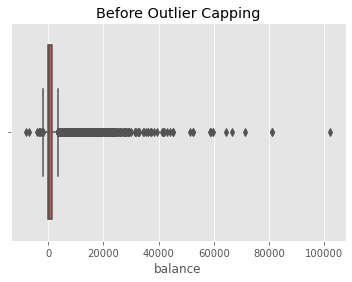

In [89]:
sns.boxplot(X_train['balance'])
plt.title('Before Outlier Capping')

In [90]:
outlier_cols=['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(X_train,col)

Text(0.5, 1.0, 'After Outlier Capping')

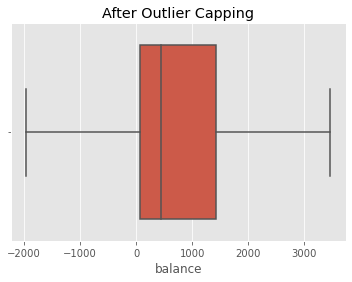

In [91]:
sns.boxplot(X_train['balance'])
plt.title('After Outlier Capping')

In [92]:
X_train.columns

Index(['age', 'job_type', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'poutcome', 'age_group',
       'bal_range', 'week', 'call_dur', 'new_contact'],
      dtype='object')

In [93]:
X_train=pd.get_dummies(X_train,columns=['job_type', 'marital', 'education','housing', 'loan',
                                       'contact', 'month','poutcome','age_group',
                                       'bal_range', 'week', 'call_dur', 'new_contact'],drop_first=False)

In [94]:
X_train.sample(2)

,age,balance,duration,campaign,job_type_admin.,job_type_blue_collar,job_type_management,job_type_retired,job_type_self_employed,job_type_technician,job_type_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_middle,age_group_senior,age_group_young,bal_range_high_bal,bal_range_low_bal,bal_range_medium_bal,bal_range_very_high_bal,week_Week1,week_Week2,week_Week3,week_Week4,call_dur_1-3min,call_dur_3-10min,call_dur_<1min,call_dur_>10 min,new_contact_new_cust,new_contact_old_cust
29242,29.0,642.0,2.6,3.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0
7573,41.0,3465.0,1.6,2.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0


In [95]:
X_train.shape

(33908, 58)

In [96]:
X_train.drop(columns=['job_type_unemployed','marital_divorced','education_unknown','housing_no','loan_no',
                     'contact_unknown','month_dec','poutcome_unknown','age_group_middle','bal_range_high_bal',
                     'week_Week1','call_dur_1-3min','new_contact_new_cust'],inplace=True)

In [97]:
X_train.shape

(33908, 45)

## Random Forest model

Lets fit a random forest model and use it to get some preliminary idea and feature selection.

In [98]:
rf=RandomForestClassifier(n_jobs=-1,oob_score=True)

In [99]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

In [100]:
rf.oob_score_

0.9010852896071724

In [101]:
rf.feature_importances_

array([0.10213313, 0.09488175, 0.17051633, 0.04283993, 0.01062347,
       0.01234297, 0.01205882, 0.00521553, 0.00887455, 0.0125595 ,
       0.0147741 , 0.01223608, 0.00881296, 0.0148427 , 0.01382237,
       0.02383912, 0.01110351, 0.01598623, 0.00567482, 0.01386972,
       0.01131935, 0.00894725, 0.0053183 , 0.01049276, 0.01310771,
       0.0135672 , 0.01148378, 0.00868377, 0.01297497, 0.01009724,
       0.01010097, 0.00686346, 0.05937439, 0.00996873, 0.01006688,
       0.00800233, 0.01397255, 0.01177188, 0.01672653, 0.01790571,
       0.01748045, 0.01599384, 0.00540467, 0.06373308, 0.0196346 ])

In [102]:
rf.feature_names_in_

array(['age', 'balance', 'duration', 'campaign', 'job_type_admin.',
       'job_type_blue_collar', 'job_type_management', 'job_type_retired',
       'job_type_self_employed', 'job_type_technician', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'housing_yes', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'age_group_senior', 'age_group_young', 'bal_range_low_bal',
       'bal_range_medium_bal', 'bal_range_very_high_bal', 'week_Week2',
       'week_Week3', 'week_Week4', 'call_dur_3-10min', 'call_dur_<1min',
       'call_dur_>10 min', 'new_contact_old_cust'], dtype=object)

In [103]:
feat_imp=pd.DataFrame(data=rf.feature_importances_,index=rf.feature_names_in_,columns=['importance'])

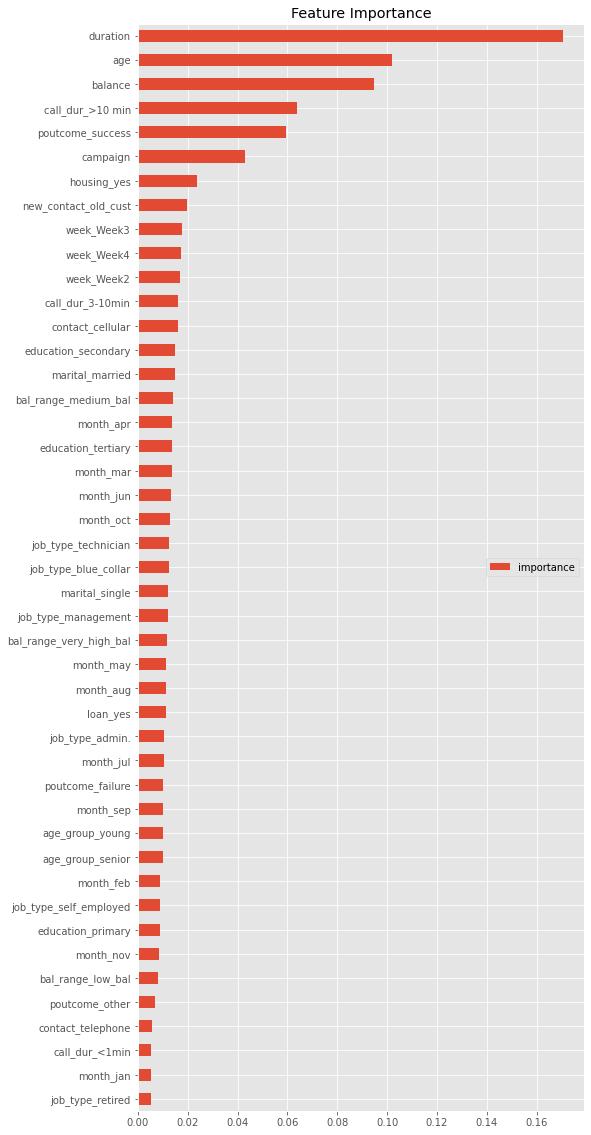

In [104]:
feat_imp.sort_values('importance').plot(kind='barh',title='Feature Importance',figsize=(8,20)).legend(loc='right')

In [105]:
feat_zip=feat_imp[feat_imp['importance']>0.015].index

In [106]:
feat_zip=feat_zip.to_list()

In [107]:
print(feat_zip)

['age', 'balance', 'duration', 'campaign', 'housing_yes', 'contact_cellular', 'poutcome_success', 'week_Week2', 'week_Week3', 'week_Week4', 'call_dur_3-10min', 'call_dur_>10 min', 'new_contact_old_cust']


## Transformed Train and Test sets

In [108]:
# Train Dataset
X_train=X_train[feat_zip]

In [109]:
print(X_train.shape)

(33908, 13)


In [110]:
# Preprocess the Test Dataset
outlier_cols=['age','balance','duration','campaign']
for col in outlier_cols:
    outlier_capping(X_test,col)

# One Hot Encoding the Categorical Variables    
X_test=pd.get_dummies(X_test,columns=['job_type', 'marital', 'education','housing', 'loan',
                                       'contact', 'month','poutcome','age_group',
                                       'bal_range', 'week', 'call_dur', 'new_contact'],drop_first=False)

X_test=X_test[feat_zip]


In [111]:
print(X_test.shape)

(11303, 13)


In [112]:
X_train.head(2)

,age,balance,duration,campaign,housing_yes,contact_cellular,poutcome_success,week_Week2,week_Week3,week_Week4,call_dur_3-10min,call_dur_>10 min,new_contact_old_cust
41626,52.0,118.0,1.750000,1.0,0,1,0,0,0,1,0,0,0
31347,28.0,459.0,1.383333,6.0,0,1,0,0,1,0,0,0,0


# Model Building and Evaluation

Since, this is a imbalance dataset with 8:1 imbalance, accuracy is not a good metric to evaluate performance.  
Balanced Accuracy is a better metric.  
Balanced accuracy=(TPR+TNR)/2 where TPR and TNR are true positive and true negative rates.  
It gives a measure of how well the model is capturing both the classes and unlike accuracy is not skewed by the majority class.

In [113]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score,classification_report

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier,BalancedBaggingClassifier,RUSBoostClassifier

In [115]:
def accuracy_BalancedAccuracy(model,X_train,X_test,y_train,y_test):
    print(model)
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    accuracy=accuracy_score(y_test,y_pred)
    bal_accuracy=balanced_accuracy_score(y_test,y_pred)
    
    print('Accuracy: {}'.format(accuracy))
    print('Balanced Accuracy: {}'.format(bal_accuracy))
    
    return accuracy,bal_accuracy

In [116]:
# creating a model dictionary
model_dict={'Random Forest':RandomForestClassifier(n_estimators=50,max_depth=5,n_jobs=-1,random_state=50),
           'Logit': LogisticRegression(random_state=50),
           'AdaBoost':AdaBoostClassifier(n_estimators=50,random_state=50),
           'balanced RF':BalancedRandomForestClassifier(n_estimators=50, max_depth=5,n_jobs=-1,
                                                        random_state=50,sampling_strategy='auto'),
           'balanced_logit':BalancedBaggingClassifier(base_estimator=LogisticRegression(),n_estimators=50,
                                                     n_jobs=-1,random_state=50),
           'Undersampled Boost':RUSBoostClassifier(base_estimator=None, #None means Decision Stump
                                             n_estimators=50,sampling_strategy='auto',
                                             random_state=50)}

In [117]:
accuracy_dict={}
balanced_accuracy_dict={}
for model in model_dict.keys():
    accuracy,balanced_accuracy=accuracy_BalancedAccuracy(model_dict[model],X_train,X_test,y_train,y_test)
    
    accuracy_dict[model]=accuracy
    balanced_accuracy_dict[model]=balanced_accuracy
    print()

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=50)
Accuracy: 0.8937450234451031
Balanced Accuracy: 0.5877819622874164

LogisticRegression(random_state=50)
Accuracy: 0.8890560028311068
Balanced Accuracy: 0.6528097991806779

AdaBoostClassifier(random_state=50)
Accuracy: 0.8945412722286119
Balanced Accuracy: 0.6514552065575475

BalancedRandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1,
                               random_state=50)
Accuracy: 0.812173759178979
Balanced Accuracy: 0.811257024219397

BalancedBaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50,
                          n_jobs=-1, random_state=50)
Accuracy: 0.8107582057860745
Balanced Accuracy: 0.8047056420312947

RUSBoostClassifier(random_state=50)
Accuracy: 0.8193399982305583
Balanced Accuracy: 0.8086221202093246



In [118]:
accuracy_dict

{'Random Forest': 0.8937450234451031,
 'Logit': 0.8890560028311068,
 'AdaBoost': 0.8945412722286119,
 'balanced RF': 0.812173759178979,
 'balanced_logit': 0.8107582057860745,
 'Undersampled Boost': 0.8193399982305583}

In [119]:
balanced_accuracy_dict

{'Random Forest': 0.5877819622874164,
 'Logit': 0.6528097991806779,
 'AdaBoost': 0.6514552065575475,
 'balanced RF': 0.811257024219397,
 'balanced_logit': 0.8047056420312947,
 'Undersampled Boost': 0.8086221202093246}

In [120]:
accuracy_ser=pd.Series(accuracy_dict)
balanced_accuracy_ser=pd.Series(balanced_accuracy_dict)

In [121]:
print(accuracy_ser)
print()
print(balanced_accuracy_ser)

Random Forest         0.893745
Logit                 0.889056
AdaBoost              0.894541
balanced RF           0.812174
balanced_logit        0.810758
Undersampled Boost    0.819340
dtype: float64

Random Forest         0.587782
Logit                 0.652810
AdaBoost              0.651455
balanced RF           0.811257
balanced_logit        0.804706
Undersampled Boost    0.808622
dtype: float64


In [122]:
results_df=pd.concat([accuracy_ser,balanced_accuracy_ser],axis=1)

In [123]:
results_df.rename(columns={0:'Accuracy',1:'Balanced_accuracy'},inplace=True)

In [124]:
results_df

,Accuracy,Balanced_accuracy
Random Forest,0.893745,0.587782
Logit,0.889056,0.652810
AdaBoost,0.894541,0.651455
balanced RF,0.812174,0.811257
balanced_logit,0.810758,0.804706
Undersampled Boost,0.819340,0.808622


In [125]:
results_df.index

Index(['Random Forest', 'Logit', 'AdaBoost', 'balanced RF', 'balanced_logit',
       'Undersampled Boost'],
      dtype='object')

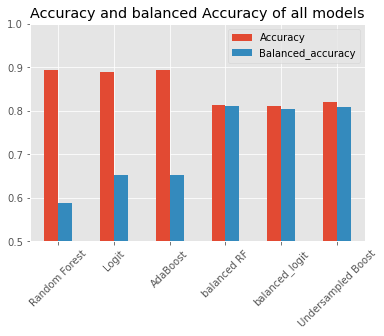

In [126]:
results_df.plot.bar(figsize=(6,4))
plt.ylim([0.5,1])
plt.title('Accuracy and balanced Accuracy of all models')
plt.xticks(rotation=45)
plt.show()

So, we see that Accuracy is better for the vanill models: Logistic Regression, Random Forest and AdaBoost,  
which is misleading for imbalanced classification evaluation.  

Following are the imbalanced ensemble approaches:  
    1) Balanced Random Forest (where each Decision Tree comprises of minority and bootstrapped majority).  
    2) Balanced Bagging with Logistic Regression as estimator.  
    3) Random Undersampled Boost(comprising of Decision stumps like AdaBoost but with random undersampling in each step).

Ensemble approaches will be better suited for our business problem because even though their overall accuracy is lower,   
they do a better job at identifying the true positives (minority) as well as true negatives (majority) .

# SMOTE oversampling

 Lets try another approach by Oversampling instead of Undersampling by SMOTE (synthetic Minority Oversampling)

In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
X_train.sample(3)

,age,balance,duration,campaign,housing_yes,contact_cellular,poutcome_success,week_Week2,week_Week3,week_Week4,call_dur_3-10min,call_dur_>10 min,new_contact_old_cust
26915,53.0,0.0,4.433333,6.0,1,1,0,0,1,0,1,0,0
37046,31.0,1545.0,3.450000,1.0,1,1,0,1,0,0,1,0,0
13763,31.0,12.0,1.350000,3.0,1,1,0,1,0,0,0,0,0


In [130]:
# For SMOTE since data is created syntheticall using nearest neighbor method, we need to rescale 
scaler=MinMaxScaler().fit(X_train)
x_train_scaled=scaler.transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [131]:
sampler=SMOTE(sampling_strategy='auto',k_neighbors=5,n_jobs=-1)

In [132]:
# Resample only the train set not the test set
X_resampled,y_resampled=sampler.fit_resample(x_train_scaled,y_train)

In [133]:
smote_acc,smote_bal_acc=accuracy_BalancedAccuracy(RandomForestClassifier(),X_resampled,x_test_scaled,y_resampled,y_test)

RandomForestClassifier()
Accuracy: 0.8590639653189419
Balanced Accuracy: 0.7452938008594339


So, we see that SMOTE oversampled Random Forest performs worser than Ensemble Undersampled models, but better than the vailla models without resampling.